In [2]:
import pandas as pd
import ast
import collections
import matplotlib.pyplot as plt

In [3]:
research_sample_df = pd.read_csv('tobacco_research_subset.csv')
research_sample_df.head(5)

,id,title_display,author_display,journal,full_text_link,score,keyword,publisher,subject,article_statistics
0,10.1371/journal.pmed.1001457,Irreconcilable Conflict: The Tobacco Industry ...,['Thomas E. Novotny'],PLoS Medicine,http://europepmc.org/articles/PMC3665893?pdf=r...,9.266217,tobacco,Public Library of Science (PLoS),Medicine,True
1,10.1371/journal.pmed.1001832,The Tobacco Endgame: Is It Possible?,['Thomas E. Novotny'],PLoS Medicine,http://europepmc.org/articles/PMC4449011?pdf=r...,8.905718,tobacco,Public Library of Science (PLoS),Medicine,True
2,10.1371/journal.pmed.1001629,Representation and Misrepresentation of Scient...,"['Selda Ulucanlar', 'Gary J. Fooks', 'Jenny L....",PLoS Medicine,http://europepmc.org/articles/PMC3965396?pdf=r...,8.093411,tobacco,Public Library of Science (PLoS),Medicine,True
3,10.1371/journal.pmed.1001506,Transnational Tobacco Company Interests in Smo...,"['Silvy Peeters', 'Anna B. Gilmore']",PLoS Medicine,http://europepmc.org/articles/PMC3769209?pdf=r...,8.093411,tobacco,Public Library of Science (PLoS),Medicine,True
4,10.1371/journal.pmed.0040300,Should the Health Community Promote Smokeless ...,"['Justine Williamson', 'Christopher Proctor']",PLoS Medicine,http://europepmc.org/articles/PMC2043003?pdf=r...,8.093411,tobacco,Public Library of Science (PLoS),Medicine,True


In [64]:
author_list = []
# flatten author list
research_sample_df.apply(lambda row: author_list.extend(ast.literal_eval(row['author_display'])),axis=1)
# Count frequency for three columns ['author_display'], ['journal'], ['subject']
author_counter = collections.Counter(author_list)
journal_counter = collections.Counter(research_sample_df['journal'])
subject_counter = collections.Counter(research_sample_df['subject'])
top10_author = author_counter.most_common(10)
top10_journal = journal_counter.most_common(10)
top10_subject = subject_counter.most_common(10)

In [66]:
top10_author

[('Anna B. Gilmore', 6),
 ('Kelley Lee', 6),
 ('Stanton A. Glantz', 5),
 ('Prakash C. Gupta', 5),
 ('Thomas E. Novotny', 4),
 ('Jeff Collin', 4),
 ('Wei Hu', 4),
 ('Guangxiao Yang', 4),
 ('Guangyuan He', 4),
 ('Ian T. Baldwin', 4)]

In [48]:
top10_journal

[('PLoS ONE', 268),
 ('PLoS Medicine', 31),
 ('PLoS Pathogens', 4),
 ('PLoS Genetics', 1)]

In [49]:
top10_subject

[('Medicine', 299), ('Immunologic diseases. Allergy', 4), ('Genetics', 1)]

<BarContainer object of 10 artists>

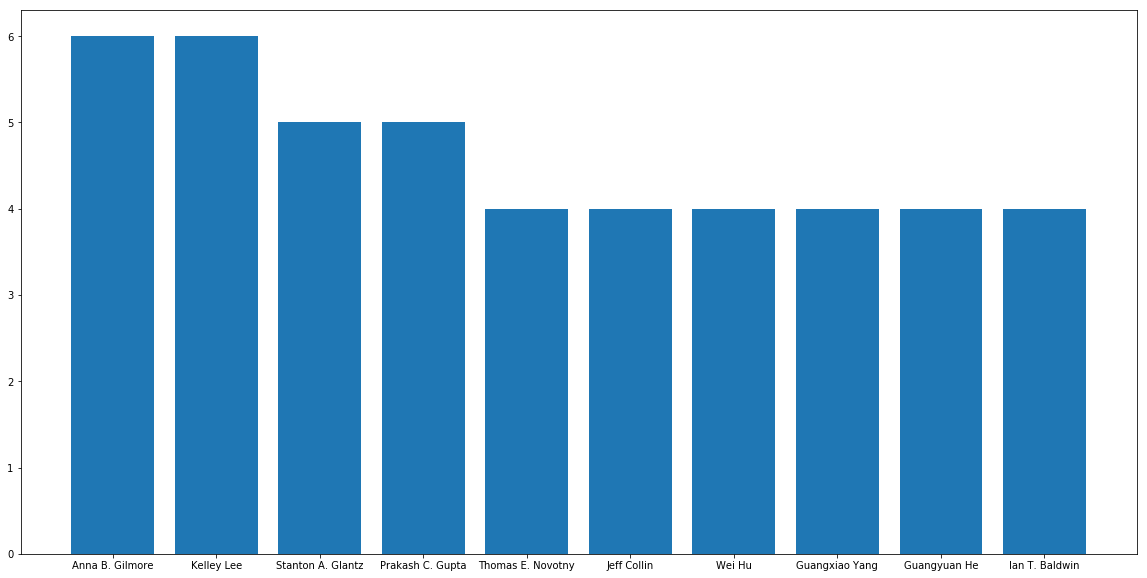

In [71]:
####################### Plot Author ######################
top10_author = dict(top10_author)
plt.figure(figsize=(20,10))
plt.bar(top10_author.keys(), top10_author.values())

<BarContainer object of 4 artists>

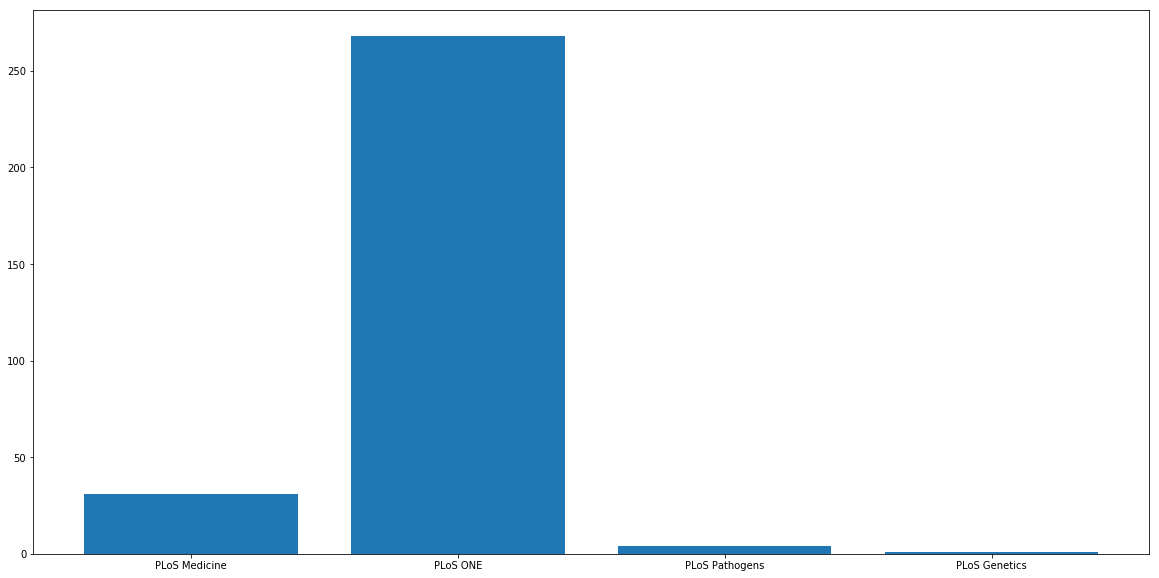

In [73]:
####################### Plot journal ######################
plt.figure(figsize=(20,10))
plt.bar(journal_counter.keys(), journal_counter.values())

<BarContainer object of 3 artists>

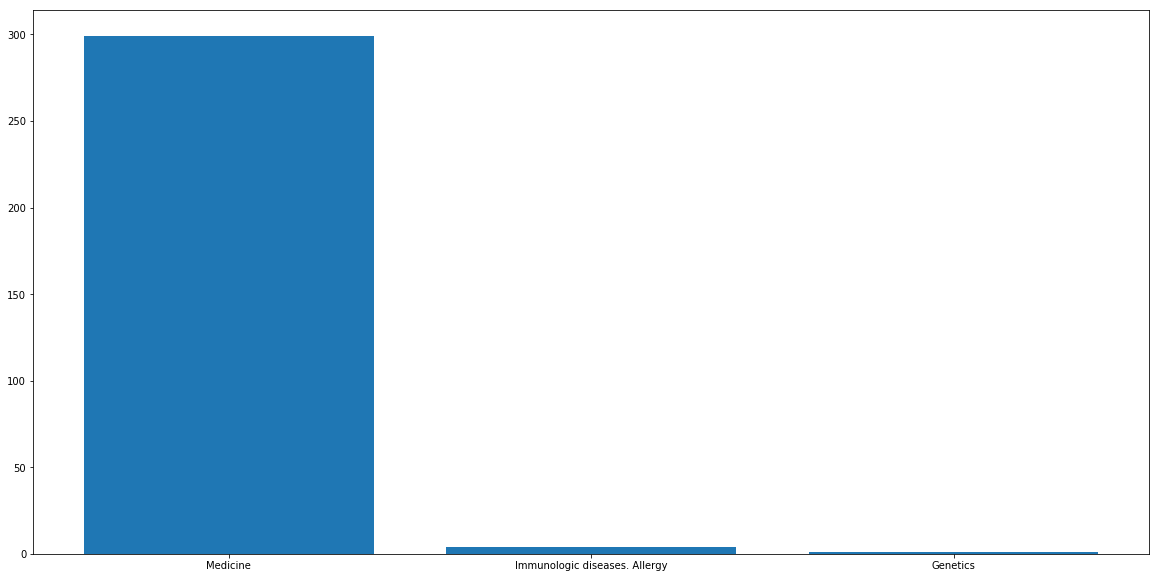

In [74]:
####################### Subject ######################
plt.figure(figsize=(20,10))
plt.bar(subject_counter.keys(), subject_counter.values())

In [107]:
########## Save .csv ##########
author = pd.DataFrame(list(author_counter.items()), columns=['Author', 'Author_Count'])
journal = pd.DataFrame(list(journal_counter.items()), columns=['Journal', 'Journal_Count'])
subject = pd.DataFrame(list(subject_counter.items()), columns=['Subject', 'Subject_Count'])
result = pd.concat([author, journal, subject], axis=1)

In [108]:
result.head(5)

,Author,Author_Count,Journal,Journal_Count,Subject,Subject_Count
0,Thomas E. Novotny,4,PLoS Medicine,31.0,Medicine,299.0
1,Selda Ulucanlar,2,PLoS ONE,268.0,Immunologic diseases. Allergy,4.0
2,Gary J. Fooks,3,PLoS Pathogens,4.0,Genetics,1.0
3,Jenny L. Hatchard,1,PLoS Genetics,1.0,NaN,NaN
4,Anna B. Gilmore,6,NaN,NaN,NaN,NaN


In [109]:
result.to_csv('tobacco_research_result.csv', index=False)